In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
ds = pd.read_csv('Social_Network_Ads.csv')

In [3]:
ds.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19.0,19000.0,0
1,15810944,Male,35.0,20000.0,0
2,15668575,Female,26.0,43000.0,0
3,15603246,Female,27.0,57000.0,0
4,15804002,Male,19.0,76000.0,0


In [4]:
X = ds.iloc[:, [2,3]].values
y = ds.iloc[:, 4].values

In [5]:
# Splitting the dataset into the training set and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [6]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [7]:
# Fitting Kernal SVM to the training set
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=0, shrinking=True,
  tol=0.001, verbose=False)

In [8]:
#Predicting the Test Set results
y_pred = classifier.predict(X_test)

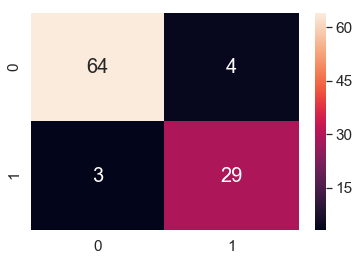

In [9]:
from sklearn.metrics import confusion_matrix
import seaborn as sn
cm = confusion_matrix(y_test, y_pred)

sn.set(font_scale=1.4)#for label size
sn.heatmap(cm, annot=True,annot_kws={"size": 20})# font size

In [10]:
from sklearn.model_selection import cross_val_score
cross_val_score

<function sklearn.model_selection._validation.cross_val_score(estimator, X, y=None, groups=None, scoring=None, cv=None, n_jobs=1, verbose=0, fit_params=None, pre_dispatch='2*n_jobs')>

In [11]:
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
accuracies

array([0.80645161, 0.96666667, 0.8       , 0.93333333, 0.86666667,
       0.83333333, 0.93333333, 0.93333333, 0.96666667, 0.96551724])

In [12]:
accuracies.mean()

0.9005302187615868

In [13]:
# Conclusion = 90% accuracy is the relevant evaluation of this model performance

In [14]:
accuracies.std()

0.06388957356626285

In [16]:
#To compute the standard deviation of this accuracy's vector that will tell us if there is a high variance or 
#low variance. So that's also very interesting and use std function that will give us the standard deviation of 
#this accuracy's vector.
#That resulted 6 percent standard deviation.
#So what does that mean.
#That means that the average of the differences between the different accuracies that we'll get when
#evaluating our model performance and the average accuracy that is 90 percent is 6 percent.
#So that's actually not too high variance.
#That's OK because that means that when we evaluate our most performance while most of the time will
#be around 84 percent and 96 percent so eventually that means that we are in this low bias and no variance
#category.

# ROC curves and Area Under the Curve

An ROC curve is the most commonly used way to visualize the performance of a binary classifier, and AUC is (arguably) the best way to summarize its performance in a single number. As such, gaining a deep understanding of ROC curves and AUC is beneficial for data scientists, machine learning practitioners, and medical researchers (among others).

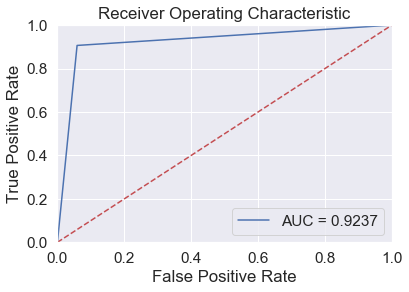

In [17]:
from sklearn.metrics import (confusion_matrix, precision_recall_curve, auc,
                             roc_curve, recall_score, classification_report, f1_score,
                             precision_recall_fscore_support)

fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, label='AUC = %0.4f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.001, 1])
plt.ylim([0, 1.001])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show();